In [1]:
import pywt
import numpy as np
import cv2
from Watermarking_LSB import loadImage, watermarkProcessing
import matplotlib.pyplot as plt

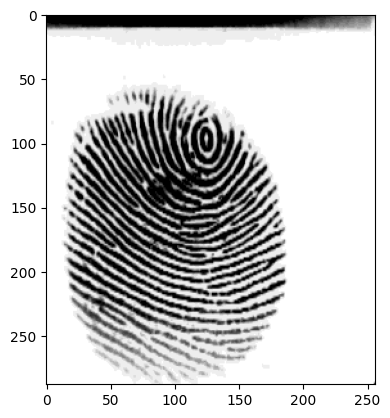

(288, 256)


In [2]:
fingerprint = loadImage("Finger.bmp")

plt.figure()
plt.imshow(fingerprint, cmap='gray')
plt.show()

print(fingerprint.shape)

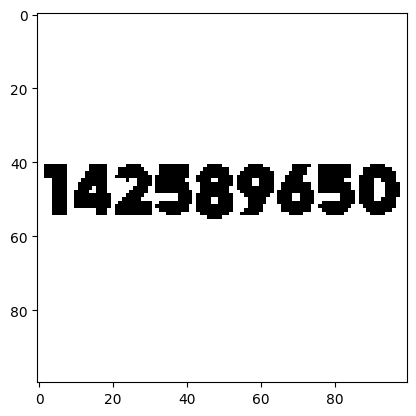

(100, 100)


In [3]:
watermark = loadImage("ID.png")
watermark = watermarkProcessing(watermark)

plt.figure()
plt.imshow(watermark, cmap='gray')
plt.show()

print(watermark.shape)

In [4]:
fingerprint = fingerprint / 255
watermark = watermark / 255

In [5]:
coeffs2 = pywt.dwt2(fingerprint, 'haar')
LL, (LH, HL, HH) = coeffs2




'''alpha = 0.1  # Scaling factor for embedding
LH_watermarked = LH + alpha * watermark'''

'alpha = 0.1  # Scaling factor for embedding\nLH_watermarked = LH + alpha * watermark'

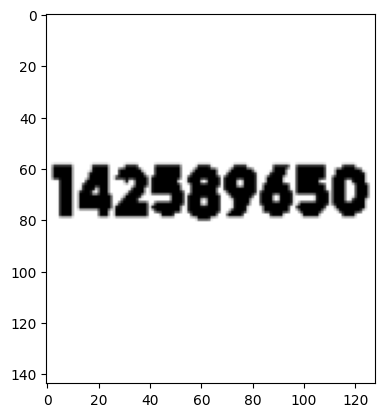

In [6]:
watermark = cv2.resize(watermark, (LH.shape[1], LH.shape[0]))

plt.figure()
plt.imshow(watermark, cmap='gray')
plt.show()


In [7]:
LH.shape

(144, 128)

In [8]:
alpha = 2  # Scaling factor for embedding
#LH = LH.astype(np.uint8)
LH_watermarked = LH + alpha * watermark
#LH_watermarked = LH_watermarked.astype(np.uint8)

In [9]:
watermarked_coeffs = LL, (LH_watermarked, HL, HH)
watermarked_image = pywt.idwt2(watermarked_coeffs, 'haar')



In [10]:
watermarked_image[50][50]

0.9450980392156866

In [11]:
watermarked_image = watermarked_image * 255

watermarked_image = watermarked_image.astype(np.uint8)

In [12]:
watermarked_image[50][50]

241

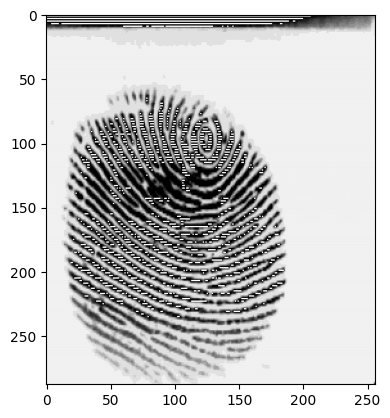

In [13]:
plt.figure()
plt.imshow(watermarked_image, cmap='gray')
plt.show()

In [14]:
coeffs2_watermarked = pywt.dwt2(watermarked_image, 'haar')
LL_w, (LH_w, HL_w, HH_w) = coeffs2_watermarked

In [15]:
coeffs2_original = pywt.dwt2(fingerprint, 'haar')
LL_o, (LH_o, HL_o, HH_o) = coeffs2_original

In [16]:
alpha = 2  # The same scaling factor used during embedding
extracted_watermark = (LH_w - LH_o) / alpha



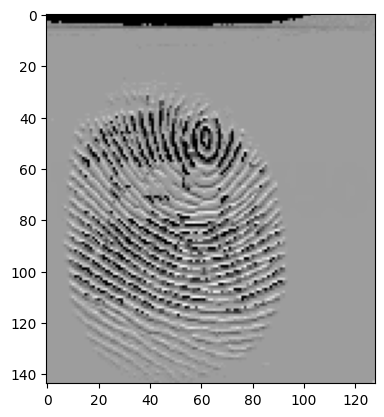

In [17]:
plt.figure()
plt.imshow(extracted_watermark, cmap='gray')
plt.show()